<a href="https://colab.research.google.com/github/develops20/Loan-Approval-Machine-Learning/blob/main/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# prompt: Create code to install libraries pandas numpy, seaborn and warnings

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Mounting this instead .
#!wget --no-check-certificate '/content/drive/MyDrive/AI Machine and Deep Learning/TitanicKaggleCompetition' -O train.csv

# Load the CSV file into a pandas DataFrame.
train = pd.read_csv('/content/drive/MyDrive/AI Machine and Deep Learning/TitanicKaggleCompetition/train.csv')

# Display the first few rows of the DataFrame (optional).
print(train.shape)
train.head()



(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


🔹 Initial Observations

1️⃣ Target Variable: Survived (1 = Survived, 0 = Did Not Survive)

2️⃣ Numerical Features: Age, Fare, Pclass, SibSp, Parch

3️⃣ Categorical Features: Sex, Embarked, Pclass (ordinal), Cabin, Ticket

4️⃣ Missing Values:

Age → 177 missing values (891 - 714)

Cabin → Most missing values (687 missing out of 891!) 😲

Embarked → 2 missing values

Overview

✅ 1. Handle Missing Values



1.   Age: Fill with median or use predictive imputation
2.   Cabin: Too many missing values, might drop or engineer a feature
3.   Embarked: Only 2 missing, can fill with mode

✅ 2. Convert Categorical Variables

1. Sex: Convert to binary (0 = male, 1 = female)
2. Embarked: One-hot encoding or label encoding

✅ 3. Feature Engineering (Optional but Powerful)
1. Extract Title from Name (e.g., Mr., Mrs., Miss.)
2. Family size (SibSp + Parch)
3. Cabin letter extraction (Deck)

✅ 4. Exploratory Data Analysis (EDA)
1. Survival rates by Pclass, Sex, Age
2. Check correlations



In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


🚀 Excellent approach! Gathering more insights before handling missing values is the way to go. 💡📊

🔹 Insights from train.describe()
✅
1. Survival Rate
Survived mean = 0.3838, meaning 38.4% of passengers survived, and 61.6% did not.
✅
2. Pclass (Ticket Class)
* Mean = 2.31, meaning most passengers were in lower classes.
* Min = 1,
* Max = 3, so only 3 unique values exist (1st, 2nd, 3rd class).
* Higher classes (1st) probably had a higher survival rate.
✅
3. Age
* Mean Age = 29.7,
* Median Age = 28, suggesting a slightly right-skewed distribution.
* Min = 0.42,
* Max = 80, meaning we have very young and very old passengers.
* Missing values: 177, so we’ll need to fill those.
✅
4. SibSp (Siblings/Spouses Aboard)
* Median = 0, meaning most passengers were alone.
* Max = 8, meaning some passengers traveled with large families.
* Survival rate may be higher for passengers with small families.
✅
5. Parch (Parents/Children Aboard)
* Median = 0, meaning most traveled without parents or children.
* Max = 6, indicating some passengers were in large families.
✅
6. Fare (Ticket Price)
* Mean = $32.20,
* Median = $14.45, meaning some people paid a lot more.
* Max Fare = 512 meaning some tickets were very expensive (probably 1st class)
* Min Fare = $0, which may indicate missing data or free tickets.


In [6]:
# prompt: show the last part of the dataframe

print(train.tail())


     PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q  


In [7]:
# prompt: shape?

train.shape


(891, 12)

In [8]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
num_features = train[['Age','SibSp','Parch','Fare','Pclass']]
cat_features = train[['Sex','Ticket','Cabin','Embarked' ]]

Age


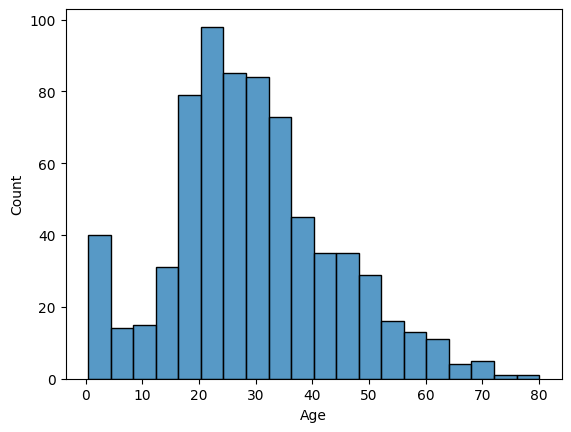

SibSp


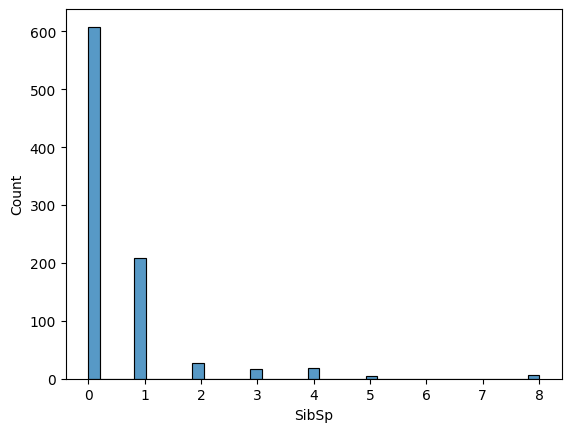

Parch


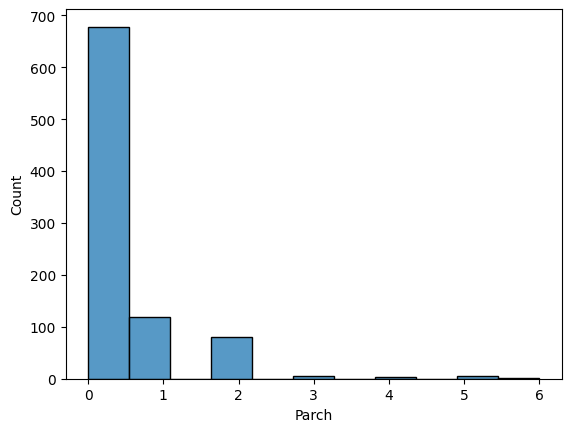

Fare


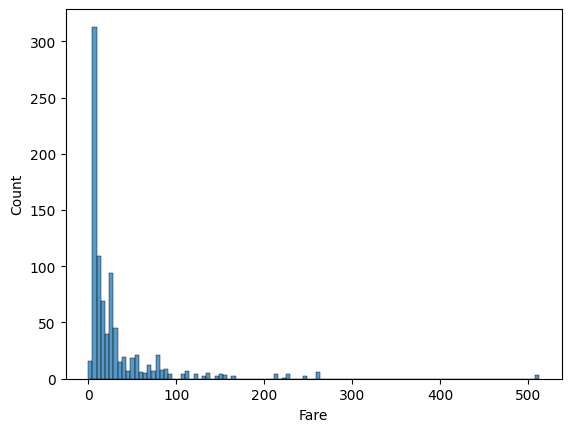

Pclass


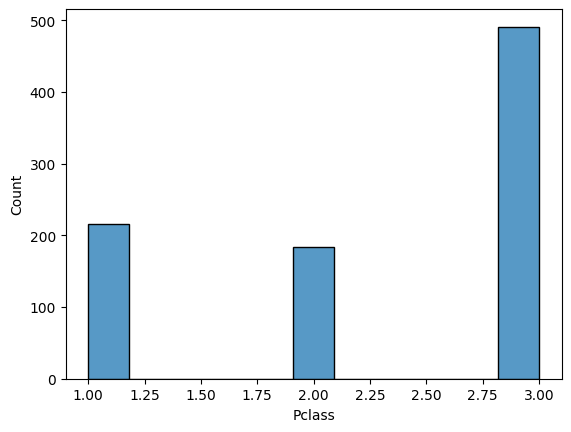

In [11]:
for i in num_features:
  print(i)
  #sns.distplot(train[i])
  sns.histplot(train[i])
  plt.show()

In [12]:
train.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


             Age     SibSp     Parch      Fare    Pclass
Age     1.000000 -0.308247 -0.189119  0.096067 -0.369226
SibSp  -0.308247  1.000000  0.414838  0.159651  0.083081
Parch  -0.189119  0.414838  1.000000  0.216225  0.018443
Fare    0.096067  0.159651  0.216225  1.000000 -0.549500
Pclass -0.369226  0.083081  0.018443 -0.549500  1.000000


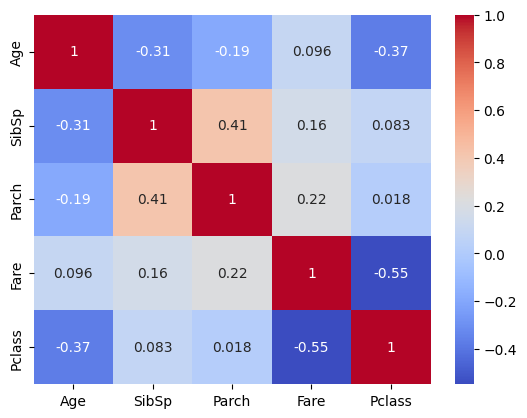

In [13]:
print(num_features.corr())
sns.heatmap(num_features.corr(), annot=True, cmap='coolwarm')
plt.show()

In [14]:
pd.pivot_table(train, index='Survived', values= ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass'])

,Age,Fare,Parch,Pclass,SibSp
Survived,,,,,
0,30.626179,22.117887,0.329690,2.531876,0.553734
1,28.343690,48.395408,0.464912,1.950292,0.473684


Sex


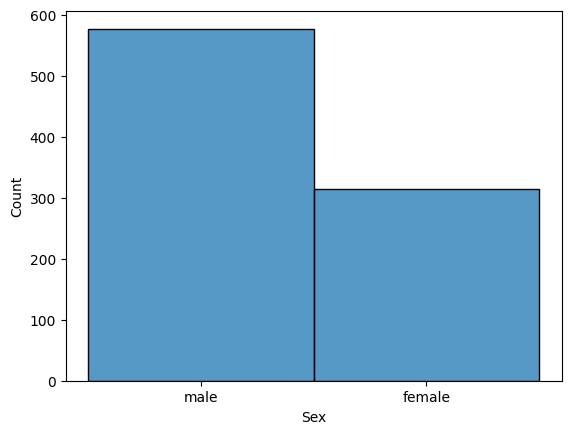

Ticket


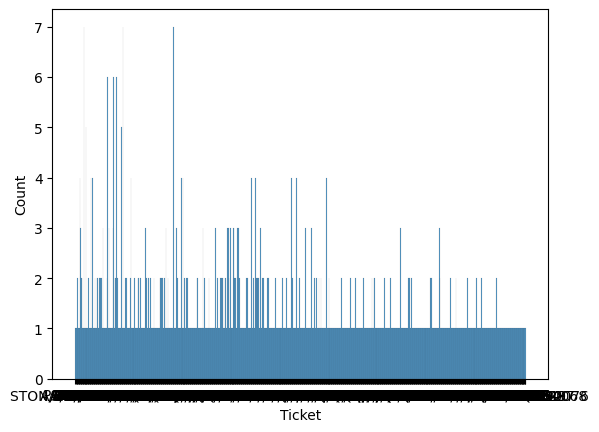

Cabin


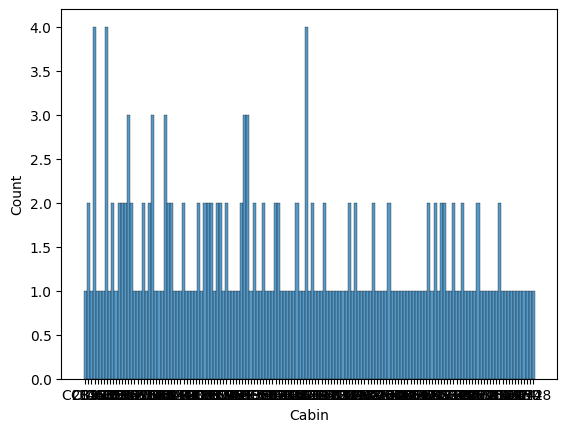

Embarked


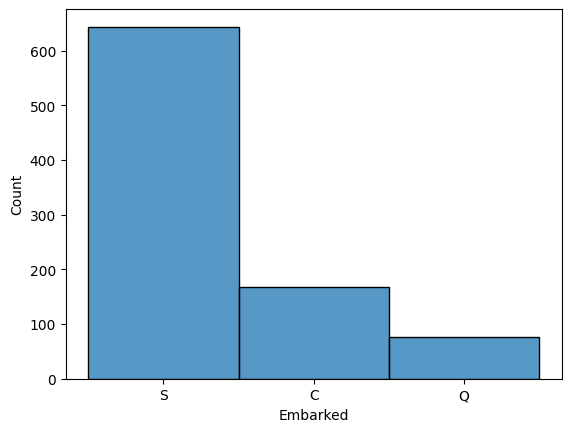

In [15]:
for i in cat_features:
  print(i)
  #sns.distplot(train[i])
  sns.histplot(train[i])
  plt.show()

In [16]:
print(pd.pivot_table(train, index='Survived', columns = 'Sex', values = 'Ticket', aggfunc = 'count'))
print()

print(pd.pivot_table(train, index='Survived', columns = 'Embarked', values = 'Ticket', aggfunc = 'count'))
print()

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217



In [17]:
print(train.groupby('Sex')['Survived'].mean())
pd.crosstab(train['Sex'], train['Survived'], normalize='index') *100

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


Survived,0,1
Sex,,
female,25.796178,74.203822
male,81.109185,18.890815


In [18]:
print(train.groupby('Embarked')['Survived'].mean())
pd.crosstab(train['Embarked'], train['Survived'], normalize='index') *100

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


Survived,0,1
Embarked,,
C,44.642857,55.357143
Q,61.038961,38.961039
S,66.304348,33.695652


In [19]:
train['Deck'] = train['Cabin'].astype(str).str[0]
print(train.groupby('Deck')['Survived'].mean())
pd.crosstab(train['Deck'], train['Survived'], normalize='index') *100

Deck
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
n    0.299854
Name: Survived, dtype: float64


Survived,0,1
Deck,,
A,53.333333,46.666667
B,25.531915,74.468085
C,40.677966,59.322034
D,24.242424,75.757576
E,25.000000,75.000000
F,38.461538,61.538462
G,50.000000,50.000000
T,100.000000,0.000000
n,70.014556,29.985444


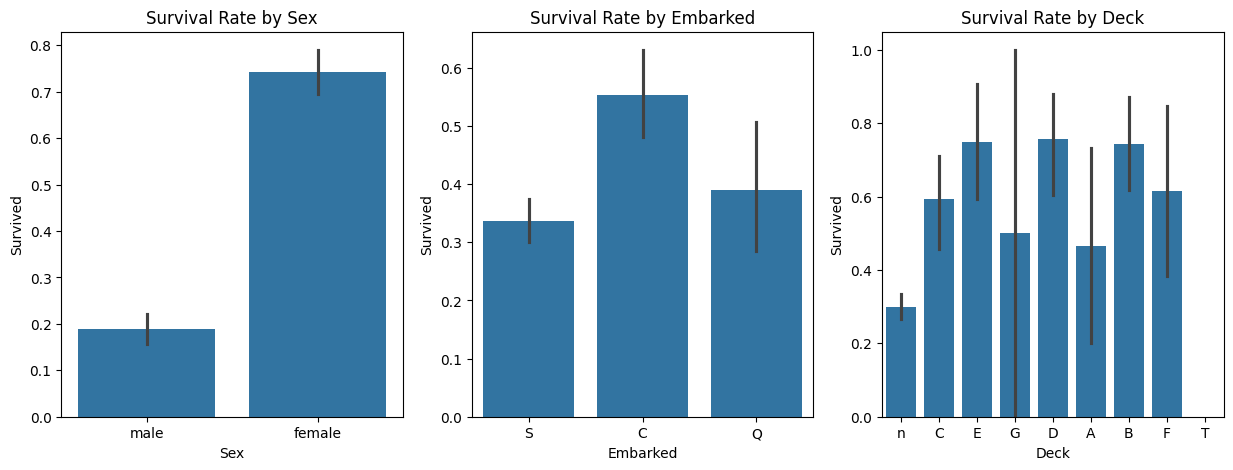

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15,5))
#Survival by sex
sns.barplot(x=train['Sex'], y=train['Survived'], ax=axes[0])
axes[0].set_title("Survival Rate by Sex")
#survival rate by Embarked
sns.barplot(x=train['Embarked'], y=train['Survived'], ax=axes[1])
axes[1].set_title("Survival Rate by Embarked")
#Survival rate by Deck
sns.barplot(x=train['Deck'], y=train['Survived'], ax=axes[2])
axes[2].set_title("Survival Rate by Deck")
plt.show()


1. Survived vs. Sex✅
Sex       female  male
Survived              
0             81   468
1            233   109

<b> Key Observations: </b>
* 468 out of 577 men died (81.1% death rate).
* 233 out of 314 women survived (74.2% survival rate).
* Women had a significantly higher survival rate (74.2%) than men (18.9%).

📌 Interpretation:
✅ Sex is a strong predictor of survival → "Women and children first!" rule in action!

2. Survived vs. Embarked (Port of Departure)✅
- Embarked   C   Q    S
- Survived              
- 0         75  47  427
- 1         93  30  217
- Survival Rates:

- C    55.36%
- Q    38.96%
- S    33.70%

<b>Key Observations:</b>

* Passengers from Cherbourg (C) had the highest survival rate (55.4%)
* Passengers from Queenstown (Q) had a moderate survival rate (38.9%)
* Passengers from Southampton (S) had the lowest survival rate (33.7%)

📌 Interpretation:
* ✅ Embarked is an important feature
* ✅ Cherbourg (C) had wealthier passengers (many 1st class) → Higher survival
* ✅ Southampton (S) had more 3rd-class passengers → Lower survival

3. Survived vs. Cabin (Deck)✅
Deck    Survival Rate
- A       46.67%
- B       74.47%
- C       59.32%
- D       75.76%
- E       75.00%
- F       61.54%
- G       50.00%
- T        0.00%
- n       29.99%

<b>Key Observations:</b>

* Deck B, D, and E had survival rates above 74% (1st class decks).
* Decks A, F, G had moderate survival rates (~50-60%).
* Deck T had 0% survival (possible error or very few passengers).
* Missing cabins (n) had a very low survival rate (29.99%) (mostly 3rd class).

📌 Interpretation:
* ✅ Deck location strongly impacts survival (higher decks → more survivors).
* ✅ Passengers with missing Cabin values were mostly in 3rd class → Higher death rate.
* ✅ Feature Engineering Idea:
Convert Cabin into Deck
If missing, assign it a new category (e.g., "Unknown" or "n")

🔹 Next Steps?
* 1️⃣ Feature Engineering: Create FamilySize = SibSp + Parch + 1
* 2️⃣ Handle Missing Values (Age, Embarked, Cabin)
* 3️⃣ Encode Categorical Variables (Sex, Embarked, Deck)

🚀 Recommended Next Step: Handle Missing Values
We have three columns with missing values:

Column	Missing Count	Strategy
* Age	177 / 891 (~20%)	Fill with median, use Title-based imputation, or predict missing values
* Cabin	687 / 891 (~77%)	Too many missing! Create a "Deck" feature and assign "Unknown" if missing
* Embarked	2 / 891 (<1%)	Fill with mode (S) because most passengers embarked from Southampton


In [22]:
#Extract title from name
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
#replace rare titles
train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

#Fill missing Age with median age per title
train['Age'] = train['Age'].fillna(train.groupby('Title')['Age'].transform('median'))


✅ This will sort AGE missing values. This will be more accurate than just putting mean/median!
Different titles correspond to different age groups (e.g., "Master" for young boys).

In [23]:
#tackle Embarked with only 2 missing features. Just put the mode of category S
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

✅ Only 2 missing values → Simple and effective.
Most passengers embarked from S (Southampton). So we force these 2 values with S

In [24]:
#Cabin is a disaster - Lets convert this to Deck and not use it anymore. Too many missing values.
train['Deck'] = train['Cabin'].fillna('Unknown').astype(str).str[0]
# Ensure that any unexpected values are treated as "Unknown"
train['Deck'] = train['Deck'].replace({'n':'Unknown'})

✅ Too many missing values to impute accurately (~77%).
Deck is useful (we saw that B, D, E decks had higher survival rates).

In [25]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [26]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,U,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,U,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,U,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,U,Rare
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,NaN,S,U,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C,Mr


In [28]:
#Drop missing values
train.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

In [29]:
train


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,1,0,3,male,22.0,1,0,7.2500,S,U,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,U,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,C,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,U,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,U,Rare
887,888,1,1,female,19.0,0,0,30.0000,S,B,Miss
888,889,0,3,female,21.0,1,2,23.4500,S,U,Miss
889,890,1,1,male,26.0,0,0,30.0000,C,C,Mr


In [30]:
# feature engineering
# create Family Size feature
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
# create IsAlone feature
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)

In [31]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,FamilySize,IsAlone
0,1,0,3,male,22.0,1,0,7.2500,S,U,Mr,2,0
1,2,1,1,female,38.0,1,0,71.2833,C,C,Mrs,2,0
2,3,1,3,female,26.0,0,0,7.9250,S,U,Miss,1,1
3,4,1,1,female,35.0,1,0,53.1000,S,C,Mrs,2,0
4,5,0,3,male,35.0,0,0,8.0500,S,U,Mr,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,U,Rare,1,1
887,888,1,1,female,19.0,0,0,30.0000,S,B,Miss,1,1
888,889,0,3,female,21.0,1,2,23.4500,S,U,Miss,4,0
889,890,1,1,male,26.0,0,0,30.0000,C,C,Mr,1,1


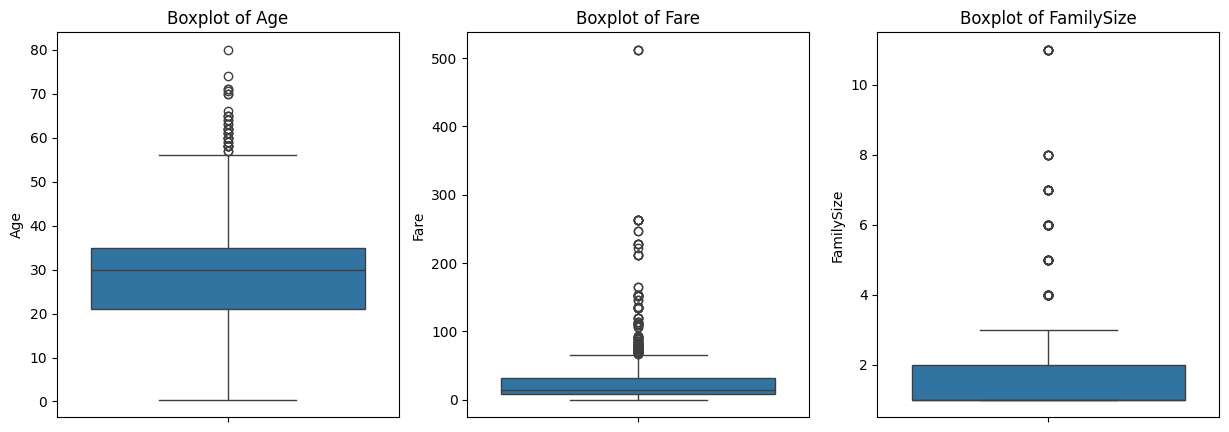

In [32]:
# Lets check for outliers
import matplotlib.pyplot as plt
import seaborn as sns

# define numerical features to check for outliers
numerical_features = ['Age', 'Fare', 'FamilySize']

# create a boxplot for each
plt.figure(figsize=(15,5))
for i, feature in enumerate(numerical_features, 1):
  plt.subplot(1, 3, i)
  sns.boxplot(y=train[feature])
  plt.title(f"Boxplot of {feature}")

plt.show()

In [35]:
summary = train[['Age', 'Fare', 'FamilySize']].describe()
print(summary)

              Age        Fare  FamilySize
count  891.000000  891.000000  891.000000
mean    29.392447   32.204208    1.904602
std     13.268389   49.693429    1.613459
min      0.420000    0.000000    1.000000
25%     21.000000    7.910400    1.000000
50%     30.000000   14.454200    1.000000
75%     35.000000   31.000000    2.000000
max     80.000000  512.329200   11.000000


In [38]:
# Remove outliers in fare - there is one ticket at 500. NEUTRALIZE THIS
train['Fare'] = train['Fare'].clip(upper=300)

In [39]:
# log transformation for smoother distribution and to reduce skewness
train['Fare'] = np.log1p(train['Fare'])

In [40]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,FamilySize,IsAlone
0,1,0,3,male,22.0,1,0,2.110213,S,U,Mr,2,0
1,2,1,1,female,38.0,1,0,4.280593,C,C,Mrs,2,0
2,3,1,3,female,26.0,0,0,2.188856,S,U,Miss,1,1
3,4,1,1,female,35.0,1,0,3.990834,S,C,Mrs,2,0
4,5,0,3,male,35.0,0,0,2.202765,S,U,Mr,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,2.639057,S,U,Rare,1,1
887,888,1,1,female,19.0,0,0,3.433987,S,B,Miss,1,1
888,889,0,3,female,21.0,1,2,3.196630,S,U,Miss,4,0
889,890,1,1,male,26.0,0,0,3.433987,C,C,Mr,1,1


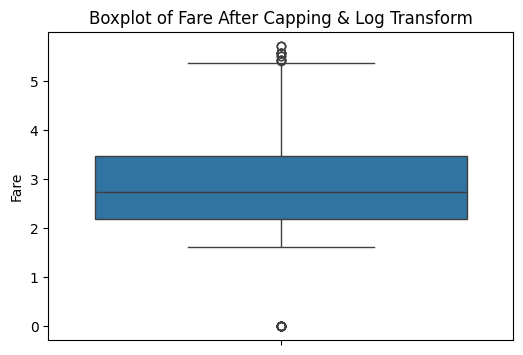

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(y=train['Fare'])
plt.title("Boxplot of Fare After Capping & Log Transform")
plt.show()

In [42]:
# Capping age at 65
train['Age'] = train['Age'].clip(upper=65)

# cap family size at 6 (max family was 11 - how many were there with 11 )
train['FamilySize'] = train['FamilySize'].clip(upper=6)

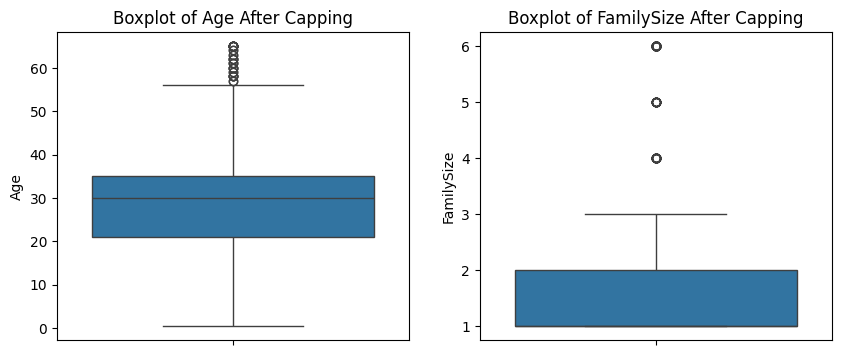

In [43]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.boxplot(y=train['Age'])
plt.title("Boxplot of Age After Capping")

plt.subplot(1, 2, 2)
sns.boxplot(y=train['FamilySize'])
plt.title("Boxplot of FamilySize After Capping")

plt.show()

In [44]:
# Label encoding for binary features (sex)
train['Sex'] = train['Sex'].map({'male':1, 'female':0})

In [45]:
# one hot encoding for the multi class features
train = pd.get_dummies(train, columns=['Embarked', 'Deck', 'Title'], drop_first=True)

In [50]:
print(train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   FamilySize   891 non-null    int64  
 9   IsAlone      891 non-null    int64  
 10  Embarked_Q   891 non-null    bool   
 11  Embarked_S   891 non-null    bool   
 12  Deck_B       891 non-null    bool   
 13  Deck_C       891 non-null    bool   
 14  Deck_D       891 non-null    bool   
 15  Deck_E       891 non-null    bool   
 16  Deck_F       891 non-null    bool   
 17  Deck_G       891 non-null    bool   
 18  Deck_T       891 non-null    bool   
 19  Deck_U  

In [51]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,1,22.0,1,0,2.110213,2,0,...,False,False,False,False,False,True,False,True,False,False
1,2,1,1,0,38.0,1,0,4.280593,2,0,...,False,False,False,False,False,False,False,False,True,False
2,3,1,3,0,26.0,0,0,2.188856,1,1,...,False,False,False,False,False,True,True,False,False,False
3,4,1,1,0,35.0,1,0,3.990834,2,0,...,False,False,False,False,False,False,False,False,True,False
4,5,0,3,1,35.0,0,0,2.202765,1,1,...,False,False,False,False,False,True,False,True,False,False


In [52]:
# Finalize boolean conversion
bool_cols = train.select_dtypes(include='bool').columns
train[bool_cols] = train[bool_cols].astype(int)

In [53]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,1,22.0,1,0,2.110213,2,0,...,0,0,0,0,0,1,0,1,0,0
1,2,1,1,0,38.0,1,0,4.280593,2,0,...,0,0,0,0,0,0,0,0,1,0
2,3,1,3,0,26.0,0,0,2.188856,1,1,...,0,0,0,0,0,1,1,0,0,0
3,4,1,1,0,35.0,1,0,3.990834,2,0,...,0,0,0,0,0,0,0,0,1,0
4,5,0,3,1,35.0,0,0,2.202765,1,1,...,0,0,0,0,0,1,0,1,0,0


In [55]:
 # Tree-based models (CatBoost, XGB, RF, ET) don’t need scaling.
# 💡 Linear models (Logistic Regression, SVM, KNN, MLP) will EXPLODE without scaling.
# We cannot risk to scale on the same dataset. We need to make 2 datasets - one scaled for the linear models and one original for the tree based models.

from sklearn.preprocessing import StandardScaler
# define the numerical cols to scale "
scale_cols = ["Age", "Fare", "FamilySize"]
#Make a copy of the dataset
X_original = train.drop(columns=['Survived', 'PassengerId'])
y = train['Survived']

# take an image copy of X original - name it scaled and implement feature scaling on scaled
X_scaled = X_original.copy()

# Apply standard scaler only to the scaled version
scaler = StandardScaler()
X_scaled[scale_cols] = scaler.fit_transform(X_scaled[scale_cols])

#Confirm the datasets REMEMBER ORIGINAL needs to be used for TREE BASED including CATBOOST Scaled needs to be used for Linear models like logistic regression
print("tree based model (NO SCALING)")
print(X_original.head())
print("\nlinear model (SCALED)")
print(X_scaled.head())





tree based model (NO SCALING)
   Pclass  Sex   Age  SibSp  Parch      Fare  FamilySize  IsAlone  Embarked_Q  \
0       3    1  22.0      1      0  2.110213           2        0           0   
1       1    0  38.0      1      0  4.280593           2        0           0   
2       3    0  26.0      0      0  2.188856           1        1           0   
3       1    0  35.0      1      0  3.990834           2        0           0   
4       3    1  35.0      0      0  2.202765           1        1           0   

   Embarked_S  ...  Deck_D  Deck_E  Deck_F  Deck_G  Deck_T  Deck_U  \
0           1  ...       0       0       0       0       0       1   
1           0  ...       0       0       0       0       0       0   
2           1  ...       0       0       0       0       0       1   
3           1  ...       0       0       0       0       0       0   
4           1  ...       0       0       0       0       0       1   

   Title_Miss  Title_Mr  Title_Mrs  Title_Rare  
0           0

In [56]:
X_original

,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Embarked_Q,Embarked_S,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,1,22.0,1,0,2.110213,2,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,1,0,38.0,1,0,4.280593,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,0,26.0,0,0,2.188856,1,1,0,1,...,0,0,0,0,0,1,1,0,0,0
3,1,0,35.0,1,0,3.990834,2,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,3,1,35.0,0,0,2.202765,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,2.639057,1,1,0,1,...,0,0,0,0,0,1,0,0,0,1
887,1,0,19.0,0,0,3.433987,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
888,3,0,21.0,1,2,3.196630,4,0,0,1,...,0,0,0,0,0,1,1,0,0,0
889,1,1,26.0,0,0,3.433987,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [57]:
X_scaled

,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Embarked_Q,Embarked_S,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,1,-0.560583,1,0,-0.882997,0.119905,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,1,0,0.662476,1,0,1.371013,0.119905,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,0,-0.254819,0,0,-0.801323,-0.622006,1,0,1,...,0,0,0,0,0,1,1,0,0,0
3,1,0,0.433152,1,0,1.070089,0.119905,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,3,1,0.433152,0,0,-0.786879,-0.622006,1,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,-0.178377,0,0,-0.333775,-0.622006,1,0,1,...,0,0,0,0,0,1,0,0,0,1
887,1,0,-0.789907,0,0,0.491785,-0.622006,1,0,1,...,0,0,0,0,0,0,1,0,0,0
888,3,0,-0.637024,1,2,0.245282,1.603728,0,0,1,...,0,0,0,0,0,1,1,0,0,0
889,1,1,-0.254819,0,0,0.491785,-0.622006,1,0,0,...,0,0,0,0,0,0,0,1,0,0


* 📌 ✅ X_original → For Tree-based models (CatBoost, XGB, RF, DART, ET, GOSS)
* 📌 ✅ X_scaled → For Linear models (Logistic Regression, MLP, KNN)
* 📌 ✅ y → Target variable (Survived)

* NEXT STEP: CROSS-VALIDATION ATTACK!
* 🔥 Now that our datasets are perfectly prepared, we must test them under the fires of battle!

*📢 STATUS UPDATE: ✅ Data Preprocessing → ✔️ COMPLETE
*✅ Handling Missing Values → ✔️ COMPLETE
*✅ Feature Engineering → ✔️ COMPLETE
*✅ Outlier Handling → ✔️ COMPLETE
*✅ Feature Encoding → ✔️ COMPLETE
*✅ Dataset Scaling (ONLY where needed) → ✔️ COMPLETE
*✅ Splitting X_original, X_scaled, and y → ✔️ COMPLETE

*💥 NEXT UP: STRATIFIED CROSS-VALIDATION! 💥
*🚀 LET’S MAKE SURE OUR FUNCTION IS READY FOR WAR!

*👉 RUN THE CROSS-VALIDATION FUNCTION NOW!
*🔥 Then let’s unleash the models one by one in the order you specified:

- 1️⃣ LGBM
- 2️⃣ DART
- 3️⃣ XGB (The Challenger)
- 4️⃣ ET
- 5️⃣ RF
- 6️⃣ CB (THE KING!) 🐱🔥
- 7️⃣ KNN
- 8️⃣ MLP
- 9️⃣ GOSS (The Surprise Contender)

In [59]:
# Load and preprocess Test
test = pd.read_csv('/content/drive/MyDrive/AI Machine and Deep Learning/TitanicKaggleCompetition/test.csv')

# Display the first few rows of the DataFrame (optional).
print(test.shape)
test.head()


(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [60]:
# Handle missing values
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)
test['Embarked'].fillna('S', inplace=True)

In [61]:
# Convert Cabin to Deck (just like we did for train)
test['Deck'] = test['Cabin'].astype(str).str[0]
test['Deck'].replace("n", "Unknown", inplace=True)

In [62]:
# Feature Engineering: Family Size & IsAlone
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test['IsAlone'] = (test['FamilySize'] == 1).astype(int)

In [63]:
# Encoding categorical variables
test['Sex'] = test['Sex'].map({'male': 1, 'female': 0})

In [65]:
# Extract Title BEFORE dropping Name
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

In [66]:
# One-hot encoding
test = pd.get_dummies(test, columns=['Embarked', 'Deck', 'Title'])

In [67]:
# NOW we can drop Name (since we extracted what we needed)
test.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

In [68]:
# Ensure test has the SAME Title & Deck categories as train
for col in X_original.columns:
    if col not in test.columns:
        test[col] = 0  # Add missing columns with default value 0

In [69]:
# Drop extra columns if test has any that train does not
test = test[X_original.columns]  # Ensure the same features as train

In [70]:
# Apply feature scaling (SAME as train)
test_scaled = test.copy()
test_scaled[scale_cols] = scaler.transform(test_scaled[scale_cols])

# Ensure both datasets are perfectly aligned
test = test[X_original.columns]  # Ensure correct column order for tree-based models
test_scaled = test_scaled[X_scaled.columns]  # Ensure correct column order for linear models

In [73]:
# Cross validation function

from sklearn.model_selection import StratifiedKFold
from sklearn.calibration import CalibrationDisplay
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

oof = {}
test_preds = {}

def cross_validation(model, label):
  print(f"\n Running Cross Valildation for {label}")

  # Determine dataset based on model type
  tree_models = ["lgbm", "dart", "xgb", "et", "rf", "cb", "goss"]
  X_used = X_original if label in tree_models else X_scaled
  test_used = test[X_used.columns] # ensure test has the same features

  # extract features and target
  y = train['Survived']
  if 'PassengerId' in X_used.columns:
    X = X_used.drop(columns=['PassengerId'], inplace=True)
  else:
    X = X_used

  val_scores = []  #  We will store validation scores (ROC AUC) here.
  test_preds_model = []  # We will store test predictions here.
  oof_model = np.zeros(len(train),)  # Out-of-fold predictions (Predictions for each validation fold).

  skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

  for fold, (train_index, val_index) in enumerate(skf.split(X, y)):
    print(f"📢 Training Fold {fold + 1}/5...")

    # Splitting train and validation data
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # fit the model
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]

    # Calculare ROC AUC Score
    roc_auc = roc_auc_score(y_val, y_pred)
    val_scores.append(roc_auc)
    oof_model[val_index] = y_pred  # Store OOF predictions for later ensembling

    # predict on the test set
    test_preds_model.append(model.predict_proba(test)[:, 1])

    print(f"Fold {fold + 1} ROC AUC Score: {roc_auc:.5f}")

  # Store final predictions
  test_preds[label] = np.mean(test_preds_model, axis=0) # Average test predictions
  oof[label] = oof_model # Store OOF predictions

  # Print final scores
  print(f"\n📊 Final Metrics for {label}:")
  print(f"Mean ROC AUC: {np.mean(val_scores):.5f}")
  print(f"Std ROC AUC: {np.std(val_scores):.5f}")

  # Generate plots
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))
  fig.suptitle(f"Model: {label}", fontsize=16)

  # Calibration curve
  CalibrationDisplay.from_predictions(y, oof_model, n_bins=10, strategy="quantile", ax=axes[0])
  axes[0].set_title("Calibration Curve")

  # Histogram
  axes[1].hist(oof_model, bins=10)
  axes[1].set_title("Histogram of Predictions")

  plt.tight_layout()
  plt.show()







* Model	Full Name
* LGBM ⚡	Light Gradient Boosting Machine
* DART 🎯	Dropouts meet Multiple Additive Regression Trees
* XGB 🦾	Extreme Gradient Boosting (XGBoost)
* ET 🌲	Extra Trees (Extremely Randomized Trees)
* RF 🏇	Random Forest (THE WORKHORSE! 🐎)
* CB 🐱	CatBoost (Categorical Boosting) (OUR BELOVED!)
* KNN 🏠	K-Nearest Neighbors
* MLP 🧠	Multi-Layer Perceptron (Neural Network)
* GOSS 🔥	Gradient-based One-Side Sampling


 Running Cross Valildation for lgbm
📢 Training Fold 1/5...
Fold 1 ROC AUC Score: 0.86607
📢 Training Fold 2/5...
Fold 2 ROC AUC Score: 0.86698
📢 Training Fold 3/5...
Fold 3 ROC AUC Score: 0.86023
📢 Training Fold 4/5...
Fold 4 ROC AUC Score: 0.85896
📢 Training Fold 5/5...
Fold 5 ROC AUC Score: 0.85806

📊 Final Metrics for lgbm:
Mean ROC AUC: 0.86206
Std ROC AUC: 0.00372


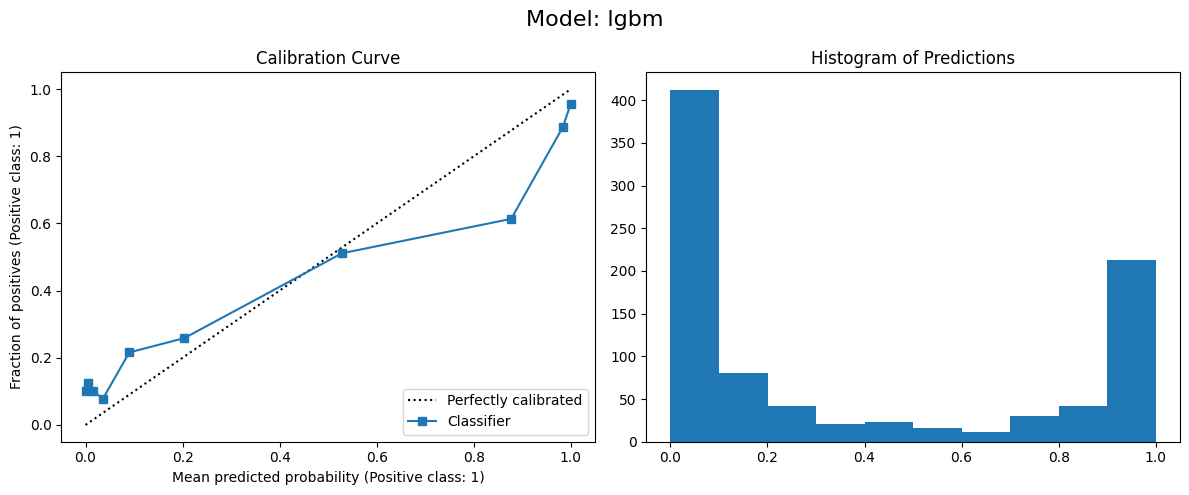

In [74]:
from lightgbm import LGBMClassifier

params_lgbm = {
    'verbose': -1,
    'random_state': 1,
    'objective': 'binary',
    'n_estimators': 4100,
    'learning_rate': 0.01,
    'colsample_bytree': 0.6,
    'max_depth': 8,
    'max_bin': 5000,
}

model_1 = LGBMClassifier(**params_lgbm)

cross_validation(model_1, 'lgbm')


 Running Cross Valildation for dart
📢 Training Fold 1/5...
Fold 1 ROC AUC Score: 0.85250
📢 Training Fold 2/5...
Fold 2 ROC AUC Score: 0.87246
📢 Training Fold 3/5...
Fold 3 ROC AUC Score: 0.87640
📢 Training Fold 4/5...
Fold 4 ROC AUC Score: 0.87333
📢 Training Fold 5/5...
Fold 5 ROC AUC Score: 0.87561

📊 Final Metrics for dart:
Mean ROC AUC: 0.87006
Std ROC AUC: 0.00890


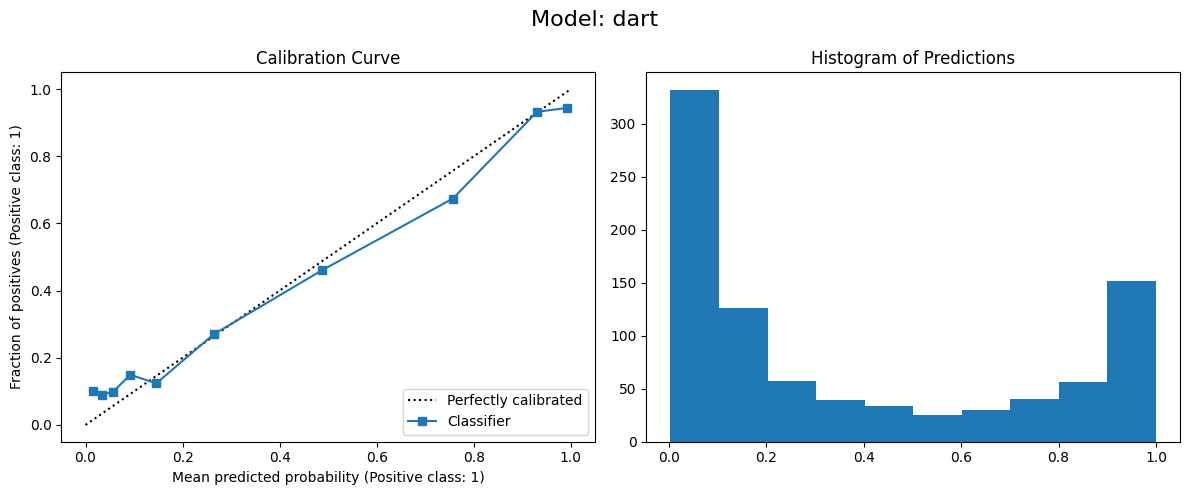

CPU times: user 5.83 s, sys: 236 ms, total: 6.07 s
Wall time: 5.88 s


In [75]:
%%time

params_dart = {

    'verbose': -1,
    'random_state': 1,
    'boosting': 'dart',
    'n_estimators': 600,
    'learning_rate': 0.1,
    'colsample_bytree': 0.6,
    'num_leaves': 85,
    'min_data_in_leaf': 30,
    'max_bin': 1995,
    'objective': 'binary',
}

model_2 = LGBMClassifier(**params_dart)

cross_validation(model_2, 'dart')


 Running Cross Valildation for xgb
📢 Training Fold 1/5...
Fold 1 ROC AUC Score: 0.87358
📢 Training Fold 2/5...
Fold 2 ROC AUC Score: 0.88088
📢 Training Fold 3/5...
Fold 3 ROC AUC Score: 0.86771
📢 Training Fold 4/5...
Fold 4 ROC AUC Score: 0.86370
📢 Training Fold 5/5...
Fold 5 ROC AUC Score: 0.85135

📊 Final Metrics for xgb:
Mean ROC AUC: 0.86745
Std ROC AUC: 0.00991


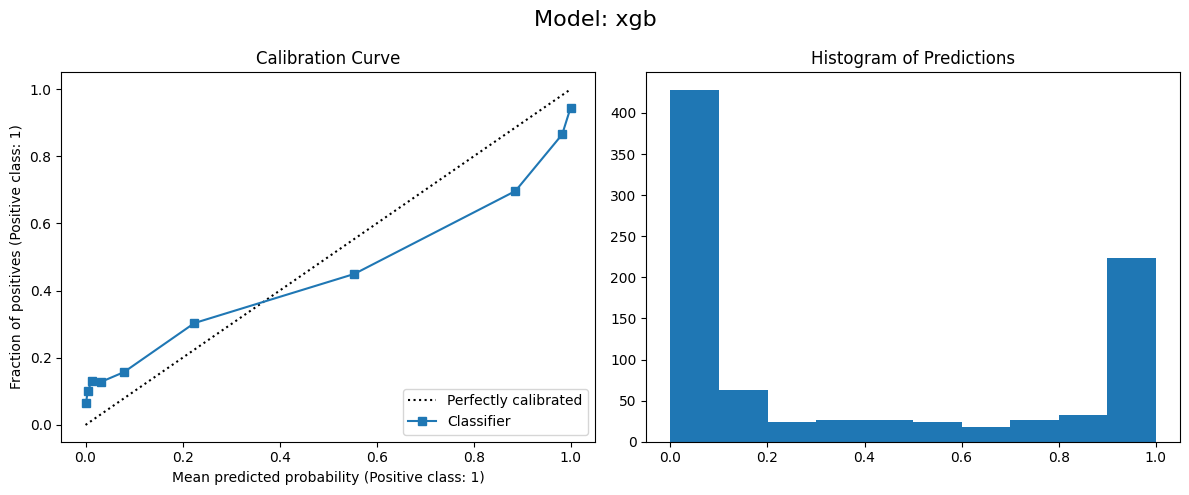

In [78]:
from xgboost import XGBClassifier

params_xgb = {

    'enable_categorical': True,
    'random_state': 1,
    'n_estimators': 10000,
    'learning_rate': 0.01,
    'colsample_bytree': 0.6,
    'reg_lambda': 0.01,
    'max_depth': 4,
    'max_bin': 5000,
    'subsample': 0.95,
    'reg_alpha': 0.1,

}

model_3 = XGBClassifier(**params_xgb)

cross_validation(model_3, 'xgb')

In [80]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.1 MB/s eta 0:00:00


CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 11.4 µs

 Running Cross Valildation for et
📢 Training Fold 1/5...
Fold 1 ROC AUC Score: 0.84111
📢 Training Fold 2/5...
Fold 2 ROC AUC Score: 0.86745
📢 Training Fold 3/5...
Fold 3 ROC AUC Score: 0.82567
📢 Training Fold 4/5...
Fold 4 ROC AUC Score: 0.84325
📢 Training Fold 5/5...
Fold 5 ROC AUC Score: 0.84690

📊 Final Metrics for et:
Mean ROC AUC: 0.84487
Std ROC AUC: 0.01341


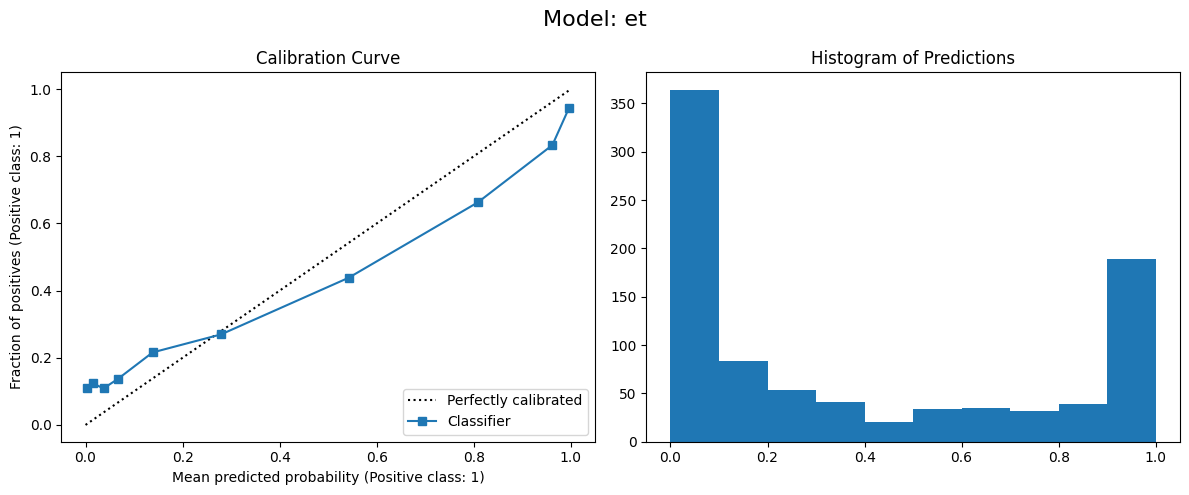

In [82]:
from sklearn.pipeline import make_pipeline
from category_encoders import TargetEncoder
from sklearn.ensemble import ExtraTreesClassifier

%time

params_et = {

    'random_state': 1,
    'n_estimators': 470,
    'min_samples_leaf': 1,
    'max_depth': 20,
    'criterion': 'log_loss',
}

model_4 = make_pipeline(TargetEncoder(), ExtraTreesClassifier(**params_et))

cross_validation(model_4, 'et')

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10 µs

 Running Cross Valildation for rf
📢 Training Fold 1/5...
Fold 1 ROC AUC Score: 0.83946
📢 Training Fold 2/5...
Fold 2 ROC AUC Score: 0.88035
📢 Training Fold 3/5...
Fold 3 ROC AUC Score: 0.87574
📢 Training Fold 4/5...
Fold 4 ROC AUC Score: 0.86183
📢 Training Fold 5/5...
Fold 5 ROC AUC Score: 0.89117

📊 Final Metrics for rf:
Mean ROC AUC: 0.86971
Std ROC AUC: 0.01782


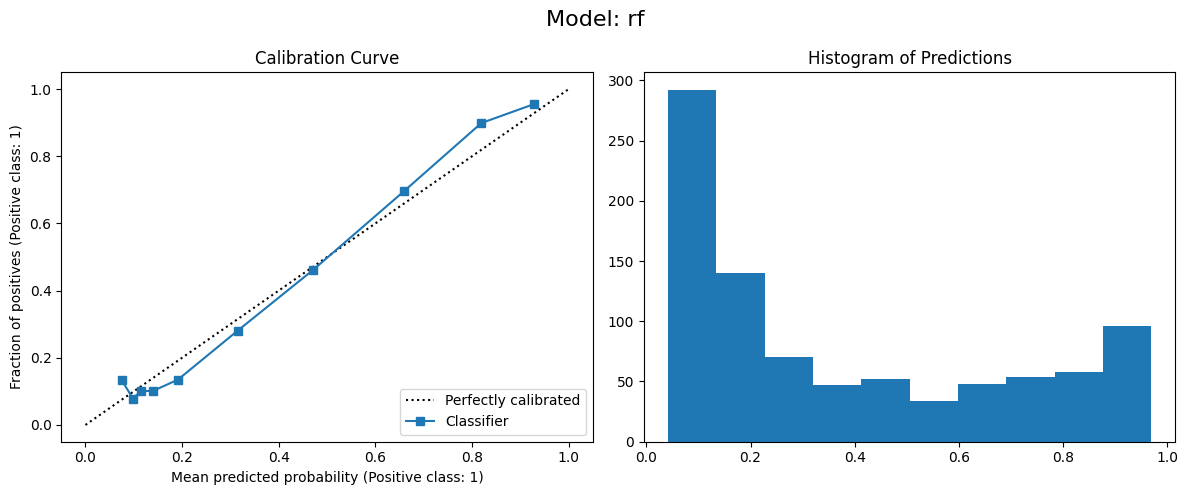

In [84]:
from sklearn.ensemble import RandomForestClassifier

%time

params_rf = {

    'random_state': 1,
    'n_estimators': 450,
    'min_samples_leaf': 5,
    'max_leaf_nodes': 960,
    'criterion': 'entropy',
}

model_5 = make_pipeline(TargetEncoder(), RandomForestClassifier(**params_rf))

cross_validation(model_5, 'rf')

In [91]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.5 MB/s eta 0:00:00


In [93]:
categorical_features = ["Sex", "Embarked_Q", "Embarked_S", "Deck_B", "Deck_C", "Deck_D",
                        "Deck_E", "Deck_F", "Deck_G", "Deck_T", "Deck_U",
                        "Title_Miss", "Title_Mr", "Title_Mrs", "Title_Rare"]


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs

 Running Cross Valildation for cb
📢 Training Fold 1/5...
Fold 1 ROC AUC Score: 0.87951
📢 Training Fold 2/5...
Fold 2 ROC AUC Score: 0.88810
📢 Training Fold 3/5...
Fold 3 ROC AUC Score: 0.86023
📢 Training Fold 4/5...
Fold 4 ROC AUC Score: 0.85836
📢 Training Fold 5/5...
Fold 5 ROC AUC Score: 0.87801

📊 Final Metrics for cb:
Mean ROC AUC: 0.87284
Std ROC AUC: 0.01160


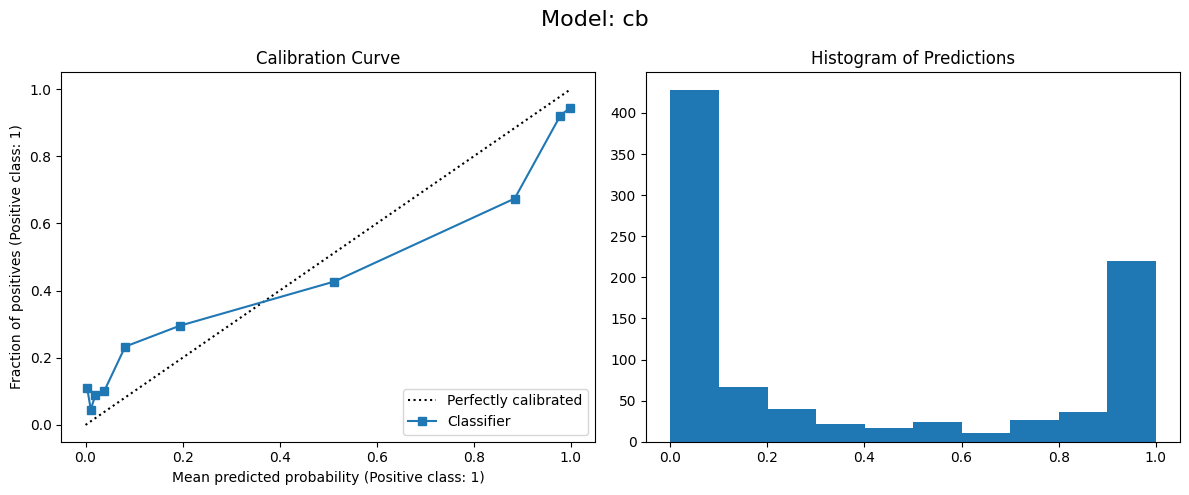

In [94]:
from catboost import CatBoostClassifier
%time

params_cb = {

    'verbose': False,
    'random_state': 1,
    'task_type': 'CPU',
    #'cat_features' : test.columns.tolist(),
    'cat_features': categorical_features,
    'min_data_in_leaf': 5,
    'n_estimators': 1800,
    'random_strength': 0.79,
    'depth': 8,
    'bagging_temperature': 0.6,
    'l2_leaf_reg': 4,
    'rsm': 0.6,
}

model_6 = CatBoostClassifier(**params_cb)

cross_validation(model_6, 'cb')

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 9.78 µs

 Running Cross Valildation for knn
📢 Training Fold 1/5...
Fold 1 ROC AUC Score: 0.80086
📢 Training Fold 2/5...
Fold 2 ROC AUC Score: 0.86584
📢 Training Fold 3/5...
Fold 3 ROC AUC Score: 0.84338
📢 Training Fold 4/5...
Fold 4 ROC AUC Score: 0.82025
📢 Training Fold 5/5...
Fold 5 ROC AUC Score: 0.86810

📊 Final Metrics for knn:
Mean ROC AUC: 0.83969
Std ROC AUC: 0.02604


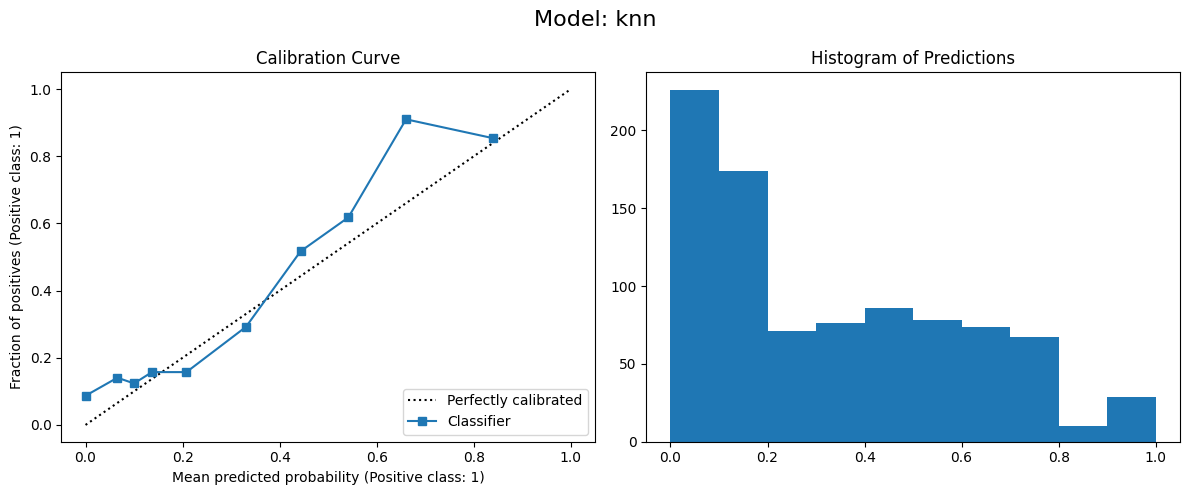

In [86]:
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier
%time

model_7 = make_pipeline(TargetEncoder(), KNeighborsClassifier(n_neighbors=185,
                                                              metric='manhattan',
                                                              weights='distance'))

cross_validation(model_7, 'knn')

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs

 Running Cross Valildation for mlp
📢 Training Fold 1/5...
Fold 1 ROC AUC Score: 0.83281
📢 Training Fold 2/5...
Fold 2 ROC AUC Score: 0.87928
📢 Training Fold 3/5...
Fold 3 ROC AUC Score: 0.82881
📢 Training Fold 4/5...
Fold 4 ROC AUC Score: 0.85969
📢 Training Fold 5/5...
Fold 5 ROC AUC Score: 0.88266

📊 Final Metrics for mlp:
Mean ROC AUC: 0.85665
Std ROC AUC: 0.02255


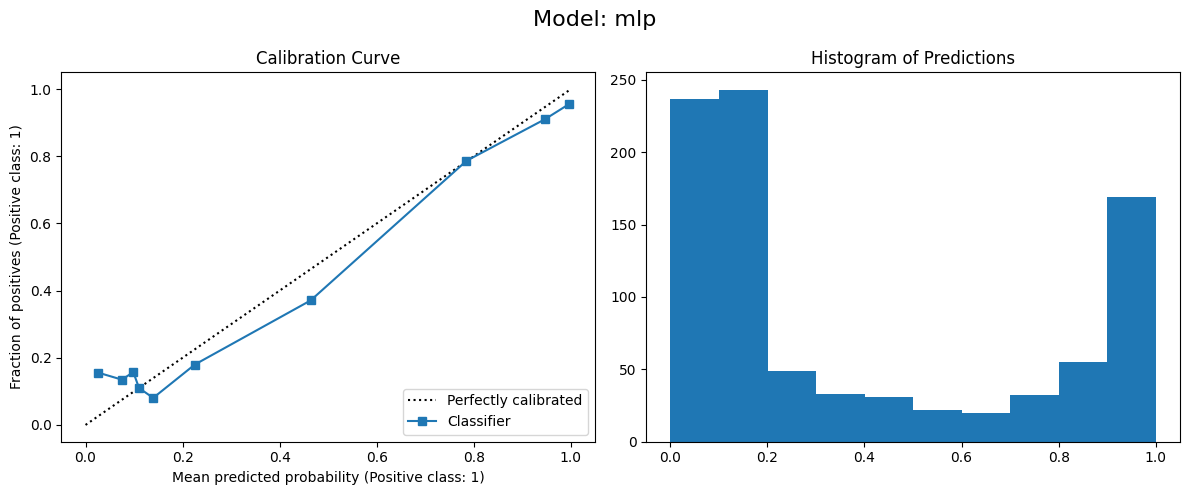

In [88]:
!pip install scikit-learn # Make sure scikit-learn is installed

from sklearn.neural_network import MLPClassifier # Import MLPClassifier
from sklearn.pipeline import make_pipeline
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler # Make sure StandardScaler is imported
%time

params_mlp = {

    'random_state': 1,
    'hidden_layer_sizes': (32, 3),

}

model_8 = make_pipeline(TargetEncoder(), StandardScaler(), MLPClassifier(**params_mlp))

cross_validation(model_8, 'mlp')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs

 Running Cross Valildation for goss
📢 Training Fold 1/5...
Fold 1 ROC AUC Score: 0.87424
📢 Training Fold 2/5...
Fold 2 ROC AUC Score: 0.88209
📢 Training Fold 3/5...
Fold 3 ROC AUC Score: 0.87841
📢 Training Fold 4/5...
Fold 4 ROC AUC Score: 0.89104
📢 Training Fold 5/5...
Fold 5 ROC AUC Score: 0.88040

📊 Final Metrics for goss:
Mean ROC AUC: 0.88124
Std ROC AUC: 0.00556


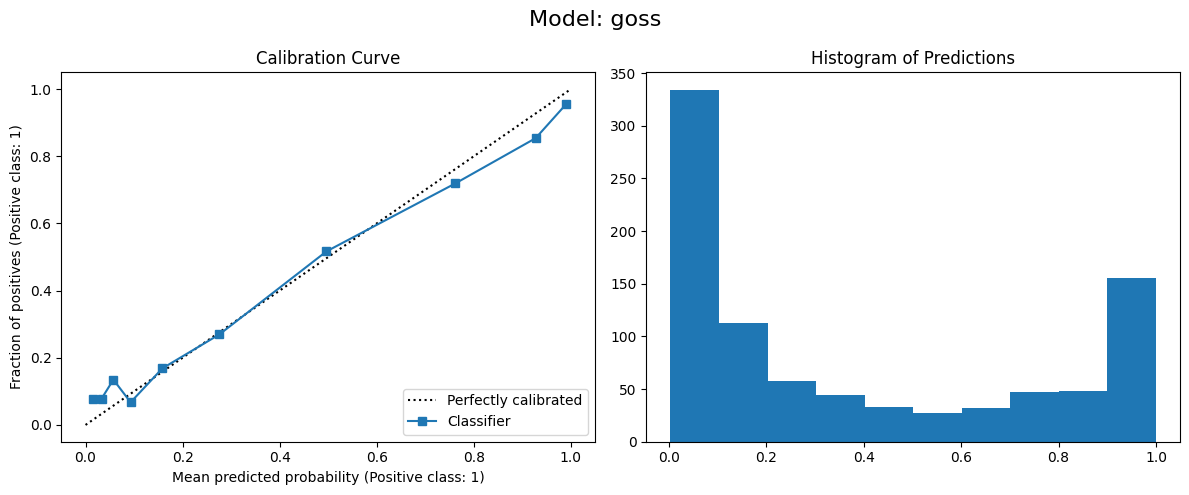

In [89]:
%time

params_goss = {

    'verbose': -1,
    'random_state': 1,
    'data_sample_strategy': 'goss',
    'n_estimators': 4000,
    'learning_rate': 0.01,
    'colsample_bytree': 0.6,
    'max_depth': 17,
    'max_bin': 4000,
}

model_9 = LGBMClassifier(**params_goss)

cross_validation(model_9, 'goss')

In [101]:
print(oof.keys())

dict_keys(['lgbm', 'dart', 'xgb', 'et', 'rf', 'knn', 'mlp', 'goss', 'cb'])


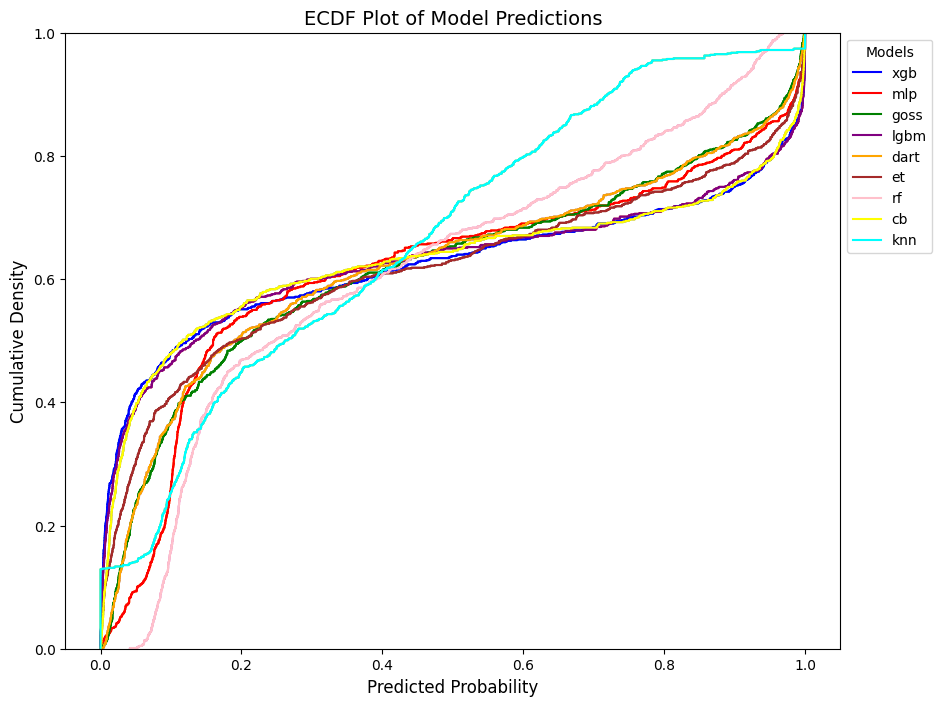

In [106]:
# Create ECDF Plot
fig, ax = plt.subplots(figsize=(10, 8))

model_colors = {
    'xgb': 'blue',
    'mlp': 'red',
    'goss': 'green',
    'lgbm': 'purple',
    'dart': 'orange',
    'et': 'brown',
    'rf': 'pink',
    'cb': 'yellow',
    'knn': 'cyan'
}

# Use ECDF to visualize predictions
sns.ecdfplot(pd.DataFrame({
    'XGBoost': oof['xgb'],
    'MLP': oof['mlp'],
    'GOSS': oof['goss'],
    'LightGBM': oof['lgbm'],
    'DART': oof['dart'],
    'Extra Trees': oof['et'],
    'Random Forest': oof['rf'],
    'CatBoost': oof['cb'],
    'KNeighbors': oof['knn']
}), ax=ax)

# Plot each model separately with its assigned color
for model, color in model_colors.items():
    if model in oof:  # Make sure the model exists in `oof`
        sns.ecdfplot(oof[model], ax=ax, label=model, color=color)

# Titles and Labels
ax.set_title("ECDF Plot of Model Predictions", fontsize=14)
ax.set_xlabel("Predicted Probability", fontsize=12)
ax.set_ylabel("Cumulative Density", fontsize=12)
# Force the legend to show
ax.legend(title="Models", loc='upper left', bbox_to_anchor=(1, 1))
# Show plot
plt.show()

📢 STEP 1: WHY ENSEMBLING WORKS
Ensembling is the ultimate cheat code in machine learning. 🤫
Instead of choosing the best model, we combine them to get better generalization.

🔹 Example in Real Life?
Imagine you're choosing a restaurant. If 9 friends recommend different places, do you go with the loudest person or take an average?
The same logic applies here! Ensembling takes the best parts of each model.

📢 STEP 2: CHOOSE AN ENSEMBLING STRATEGY
🔹 OPTION 1: Simple Averaging (Baseline)
We simply average the predictions from all models.
It’s quick but not the best.
Works well if all models are similarly strong.

🔹 OPTION 2: Weighted Averaging (Better)
We give more weight to the best models (e.g., GOSS, DART, RF).
Weak models (KNN, Extra Trees) get less importance.
Requires manual weight tuning OR Hill Climbing.

🔹 OPTION 3: Stacking (BEST)
Instead of averaging, we train a final meta-model that learns from all base models.
This meta-model (e.g., Logistic Regression) learns which models to trust for different cases.
🛠 We will start with Weighted Averaging and then move to Hill Climbing!

In [107]:
# Simple Averaging
test_preds['ensemble_avg'] = np.mean(list(test_preds.values()), axis=0)

# Store the out-of-fold predictions
oof['ensemble_avg'] = np.mean(list(oof.values()), axis=0)

# Check performance
roc_auc_avg = roc_auc_score(y, oof['ensemble_avg'])
print(f"📊 ROC AUC of Simple Averaging: {roc_auc_avg:.5f}")

📊 ROC AUC of Simple Averaging: 0.87782


🔥 EXCELLENT! ROC AUC of Simple Averaging: 0.87782 is already strong, but WE CAN DO BETTER using HILL CLIMBING ENSEMBLING! 🚀😼



📌 PLAN: HOW WILL WE DO IT?
🛠 1️⃣ Define the Objective Function
We want to find the best weights for each model to maximize ROC AUC.
The function will: ✅ Take a set of weights for each model.
✅ Compute the weighted sum of model predictions.
✅ Calculate the ROC AUC score.
✅ Iterate & improve the weights.

🛠 2️⃣ Apply a Hill Climbing Algorithm
Start with random weights for each model.
Adjust them slightly and see if ROC AUC improves.
Keep adjusting until no further improvement is possible.

In [129]:
from scipy.optimize import minimize

# Get all model predictions
models = list(oof.keys()) # all trained models

# Define the objective function to maximize ROC AUC
def objective(weights):
  weights = np.array(weights)
  weights /= np.sum (weights) # normalize weights to sum to 1

  # computer weighted enmsemble predictions
  ensemble_pred = np.zeros_like(oof[models[0]])
  for i, model in enumerate(models):
    ensemble_pred += weights[i] * oof[model]

  return -roc_auc_score(y, ensemble_pred) #minimizes the negative ROC AUC

# initial weights equal for all models
#initial_weights = [1/len(models)] * len(models)
initial_weights = np.random.dirichlet(np.ones(len(models)), size=1)[0]
# Constraint: Weights must sum to 1
constraints = {'type': 'eq', 'fun': lambda w: np.sum(w) -1}

# Bounds: Each weight must be between 0 and 1
bounds = [(0, 1)] * len(models)

# Optimize weights
result = minimize(objective, initial_weights, bounds=bounds, constraints=constraints, method='Nelder-Mead')

# get best weights
best_weights = result.x / np.sum(result.x)  # normalize weights

# Print results
print("\n optimized model weights ")
for model, weight in zip(models, best_weights):
  print(f"{model}: {weight:.4f}")

# Compute final ensemble prediction
final_ensemble_pred = np.zeros_like(oof[models[0]])
for i, model in enumerate(models):
  final_ensemble_pred += best_weights[i] * oof[model]

# compute the final ROC AUC
final_roc_auc = roc_auc_score(y, final_ensemble_pred)
print(f"\n optimized ensemble ROC AUC: {final_roc_auc:.5f}")








 optimized model weights 
lgbm: 0.0013
dart: 0.0870
xgb: 0.1854
et: 0.0000
rf: 0.0597
knn: 0.1884
mlp: 0.2076
goss: 0.0664
cb: 0.1935
ensemble_avg: 0.0108

 optimized ensemble ROC AUC: 0.88032


Whic models performed the best?

Wight analysis

💰 (High Weight = Most Valuable)
These models contributed the most to the final ensemble:
✅ MLP (0.2076) → The highest-paid employee! 💵
✅ CatBoost (0.1935) → Our beloved Cat did well, got a high salary! 🐱💰
✅ KNeighbors (0.1884) → Surprisingly, KNN did really well! 🏡💰
✅ XGBoost (0.1854) → XGB redeemed itself. Not the best, but still valuable. 🔥

💵 Paid Less (Medium Weight = Somewhat Useful)
These models contributed, but not as much as the top ones:
🔸 DART (0.0870) → Meh, it helped, but wasn’t a game-changer. 🎯
🔸 GOSS (0.0664) → Gradient One-Side Sampling was barely useful. 😐
🔸 Random Forest (0.0597) → Contributed, but wasn’t a big player. 🌳

🚫 FIRED (Weight = 0, Model Completely Ignored)
❌ Extra Trees (0.0000) → Useless. Sent straight to the unemployment line. 😭🌲
❌ LGBM (0.0013) → Barely alive. Given just enough weight to survive. 🤏

📢 What does this tell us?
1️⃣ MLP & CatBoost were the biggest contributors! 💪
2️⃣ KNN & XGB surprisingly did well! 📈
3️⃣ Extra Trees got completely FIRED. 🔥🚫
4️⃣ LGBM, despite being strong in other competitions, was almost ignored. 😨



Receiver Operating Characteristic - Area Under the Curve measures how well our model separates survivors from non-survivors.

In [130]:
# Compute the final weighted ensemble predictions for the test set
final_preds = np.zeros_like(test_preds[models[0]])

for i, model in enumerate(models):
    final_preds += best_weights[i] * test_preds[model]

# Convert probabilities to class labels (Survived: 1, Not Survived: 0)
final_preds = (final_preds > 0.5).astype(int)

In [132]:
# Reload test.csv to get PassengerId
test_original = pd.read_csv('/content/drive/MyDrive/AI Machine and Deep Learning/TitanicKaggleCompetition/test.csv')  # Replace with actual test file name
test_ids = test_original["PassengerId"]

# Create the submission DataFrame
submission = pd.DataFrame({'PassengerId': test_ids, 'Survived': final_preds})

# Save it as a CSV file
submission_file = "optimized_ensemble_submission.csv"
submission.to_csv(submission_file, index=False)

print(f"✅ Submission file '{submission_file}' has been created!")

✅ Submission file 'optimized_ensemble_submission.csv' has been created!


In [133]:
from google.colab import files
files.download(submission_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>